In [1]:
import numpy as np

In [ ]:
n = 10
A = np.zeros((n,n))
for i in range(0, n):
    for j in range(0, n):
        A[i,j] = (i+j+1)/(i+j+2)
    A[i,i] = i+1
a,b,c = A[5,7], A[6,6], A[2,8]
print(f"a, b, c: {a}, {b}, {c}")

from numpy.linalg import norm
Acheck = norm(A.T @ A - np.eye(n), ord=2)
print(f"Acheck: {Acheck}")

print(f"comment1='no'")

from numpy.linalg import cond
condA = cond(A)
print(f"condA: {condA}")

from numpy.linalg import eig
EigA, _ = eig(A)
EigA = sorted(EigA)
print(f"EigA: {EigA}")

print(f"comment2='yes'")

from scipy.linalg import qr
Q,R = qr(A)
Rd = np.diag(R)[:5]
print(f"Rd: {Rd}")

a, b, c: 0.9285714285714286, 7.0, 0.9166666666666666
Acheck: 211.47940499078126
comment1='no'
condA: 30.188374647312614
EigA: [0.48285717556198404, 1.4165082769706157, 2.4117617651491994, 3.4262863173426537, 4.450097502726905, 5.481315209597755, 6.521283131772203, 7.574979448289374, 8.658237855581024, 14.576673317008293]
comment2='yes'
Rd: [-2.69597431 -1.35202226 -2.17403607 -3.04747214 -3.9257866 ]


yspteval: [ 369.55547643  438.30202357  648.82142928  934.23600932 1458.03203345
 1501.42585688 1075.28953903 1145.67848699 1389.94651301]
xls: [  804.14811989 -1376.39255803   850.57279554   -36.56575082]
yteval: [ 312.00464738  525.77644716  758.22776578  971.4997116  1148.25786005
 1278.8420628  1357.21434265 1379.30198797 1342.20388673]


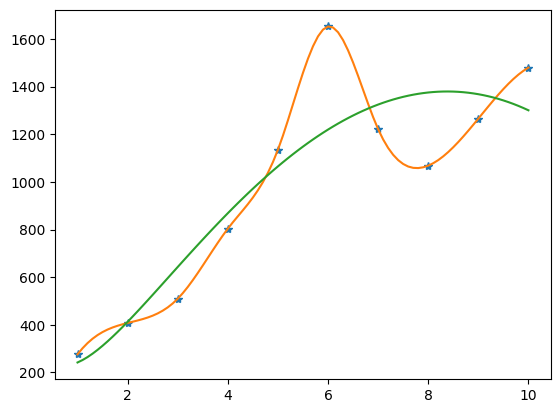

In [41]:
tdat = [1,2,3,4,5,6,7,8,9,10]
ydat = [275.99, 407.67, 509.42, 803.62, 1135, 1652.7, 1221.6, 1068.3, 1265.7, 1480]

from scipy.interpolate import CubicSpline
spl = CubicSpline(tdat, ydat)
teval = np.arange(1, 10) + 0.5
yspteval = spl(teval)
print(f"yspteval: {yspteval}")

from numpy.linalg import lstsq
p = lambda t : [1, np.sqrt(t), t, t**2]
M = [p(t) for t in tdat]
xls,_,_,_ = lstsq(M, ydat, rcond=None)
print(f"xls: {xls}")
yteval = [p(t) for t in teval] @ xls
print(f"yteval: {yteval}")

import matplotlib.pyplot as plt
tplt = np.linspace(1,10,91)
ypltspline = spl(tplt)
ypltls = xls[0] + xls[1]*np.sqrt(tplt) + xls[2]*tplt + xls[3] * tplt**2;
plt.plot(tdat,ydat,'*', tplt,ypltspline,tplt,ypltls)

nfzero: 2
xfzero: [0.53161136]
xapp: 0.531611360244264
Error: [0.36031825082399527, 0.013136063636876916, 0.00015326759917844157]
xs5: 0.6148828791986015


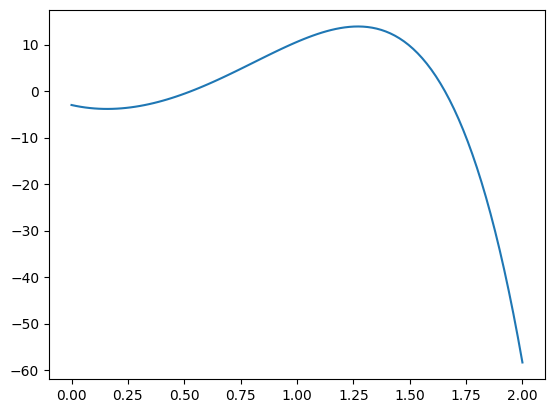

In [59]:
f = lambda x : 40*x**2 + 1/((1+x)**3) - 4 * np.exp(2*x)
x = np.linspace(0, 2, 100)
plt.plot(x, f(x))
nfzero = 2
print(f"nfzero: {nfzero}")

from scipy.optimize import fsolve
xfzero = fsolve(f, 1/4)
print(f"xfzero: {xfzero}")

df = lambda x : 80*x + -3*(1/(1+x)**4) - 8*np.exp(2*x)
newton_step = lambda xn : xn - f(xn)/df(xn)
tol = 2**-52
xn = 1/4
xapp = xn
while True:
    xapp = newton_step(xn)
    if np.abs(xapp - xn) < tol:
        break
    xn = xapp
print(f"xapp: {xapp}")

Error = []
x00 = 1/4
for _ in range(3):
    xn1 = newton_step(x00)
    en = np.abs(xn1 - xapp)
    Error.append(en)
    x00 = xn1
print(f"Error: {Error}")

def secant_step(xn, xn1):
    return xn - ((f(xn)/(f(xn) - f(xn1)))*(xn - xn1))
x000 = 0
x1 = 1
xs5 = None
for i in range(1, 4):
    xs5 = secant_step(x1, x000)
    x000 = x1
    x1 = xs5
print(f"xs5: {xs5}")

In [72]:
N=6
h = (np.pi/2)/N
x = np.linspace(0, np.pi/2, N+1)
w = 2*np.ones(N+1)
w[0] = w[-1] = 1
print(w)
f = lambda x : np.cos(3*x)/(np.sin(x)+1)
f = f(x)
Qf = h/2 * (w.T @ f)
print(f"Qf: {Qf}")

ws = np.ones(N+1)
ws[1::2] = 4
ws[2:-1:2] = 2
print(ws)
Qfs = h/3 * (ws.T @ f)
print(f"Qfs: {Qfs}")


N=100
h = (np.pi/2)/N
x = np.linspace(0, np.pi/2, N+1)
w = 2*np.ones(N+1)
w[0] = w[-1] = 1
f = lambda x : np.cos(3*x)/(np.sin(x)+1)
f = f(x)
Qf2 = h/2 * (w.T @ f)
print(f"Qf: {Qf}")

ws = np.ones(N+1)
ws[1::2] = 4
ws[2:-1:2] = 2
Qfs2 = h/3 * (ws.T @ f)
print(f"Qfs: {Qfs}")

true = 2 - np.log(8)

errtrap = np.abs(true - Qf2)
errsimp = np.abs(true - Qfs2)
print(f"errtrap, errsimp: {errtrap}, {errsimp}")


[1. 2. 2. 2. 2. 2. 1.]
Qf: -0.06494481455952907
[1. 4. 2. 4. 2. 4. 1.]
Qfs: -0.08032763595942935
Qf: -0.06494481455952907
Qfs: -0.08032763595942935
errtrap, errsimp: 5.140700113102914e-05, 1.12467853363718e-08


In [ ]:
from scipy.linalg import solve

def do(N=4):
    h = 1/N
    x = np.linspace(0, 1, N+1)
    A = np.diag([-2] * (N)) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)
    C = np.eye(N) * -1 * h**2
    A = A + C
    A[0,:] = np.zeros(N)
    A[0,:3] = [3, -4, 1] 
    f = lambda x : (np.pi**2/4 + 1) * np.cos(np.pi + np.pi*x/2)
    a = np.zeros(N)
    a[1:] = h**2 * f(x[1:-1])
    U = solve(A, a)
    return U

U4 = do()
print(f"U4: {U4}")

true_u = lambda x : np.cos(np.pi * x / 2)
U80 = do(80)
U160 = do(160)
U320 = do(320)
E1 = norm(U80 - true_u(np.linspace(0, 1, 81)[:-1]), ord=np.inf)
E2 = norm(U160 - true_u(np.linspace(0, 1, 161)[:-1]), ord=np.inf)
E3 = norm(U320 - true_u(np.linspace(0, 1, 321)[:-1]), ord=np.inf)
E = [E1, E2, E3]
print(f"E: {E}")

OC = [np.log(E[i]/E[i+1])/np.log(2) for i in range(2)]
print(f"OC: {OC}")

U4: [0.99101639 0.91964721 0.70553968 0.38228945]
E: [2.067360613444702e-05, 5.437311371814246e-06, 1.3937968925681332e-06]
OC: [1.9268247099603988, 1.9638731040067323]


In [85]:
from numpy.linalg import solve, norm
from numpy import diag, cos, log, ones, zeros, pi, inf
from numpy import linspace
N=4
x = linspace(0,1,N+1)
U4 = zeros(N)
h=1/N
d1=ones(N-1)
d4=ones(N-1)
d1[0]=-4
d2=zeros(N-2)
d2[0]=1
d3=ones(N)*(-2-h**2)
d3[0]=3
A=diag(d1,1)+diag(d4,-1)+diag(d3)+diag(d2,2)
a=zeros(N)
a[1:]=h**2*(1+pi**2/4)*cos(pi+pi/2*x[1:N])
U4=solve(A,a)
print(U4)
E=zeros(3)
OC=zeros(2)
for i in range(0,3):
    N=(2**i)*80
    x1 = linspace(0,1,N+1)
    U = zeros(N)
    h1=1/N
    d1=ones(N-1)
    d4=ones(N-1)
    d1[0]=-4
    d2=zeros(N-2)
    d2[0]=1
    d3=ones(N)*(-2-h1**2)
    d3[0]=3
    A1=diag(d1,1)+diag(d4,-1)+diag(d3)+diag(d2,2)
    a1=zeros(N)
    a1[1:]=h1**2*(1+pi**2/4)*cos(pi+pi/2*x1[1:N])
    U=solve(A1,a1)
    u= cos(pi/2*x1[0:N]).T  
    E[i]=norm(U-u,inf)
OC[0]=log(E[0]/E[1])/log(2)
OC[1]=log(E[1]/E[2])/log(2)
print(E)

[0.99101639 0.91964721 0.70553968 0.38228945]
[2.06736061e-05 5.43731138e-06 1.39379687e-06]
